# Homework 1 Bioengineering 599

In [1]:
from controlSBML import ControlSBML
import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Problem Description

This model describes interactions regulating cell cycle in Xenpus laevis. The phosphorolation of CyclinB1Cdk1 complexes is a necessary precursor to mitosis. This phosphorylation is regulated by three key interacting proteins (see [figure 1](https://journals.plos.org/plosbiology/article/figure/image?download&size=original&id=10.1371/journal.pbio.1001788.g001) in [accompanying publication](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1001788)). The regulatory dynamics are described in [this ODE model](https://www.ebi.ac.uk/biomodels/BIOMD0000000719#Overview). Repressing the peak of phosphorolated CyclinB1Cdk1 oscillations could delay or inhibit cell cycle progression.

To repress phosphorolated CyclinB1Cdk1 oscillations, I will try to regulate APC_C. APC_C, which is activated by Plx_1_active, targets Cyclin for degradation by the protesome.


**Comments:** You are describing a multiple output model. There are some complexities with multiple outputs that I don't teach. So, feel free to limit yourself to one output if you run into problems.

### Control Objectives

To try to repress or slow the progression of the cell cycle, my control objectives are as follows
- Maintain APC_C_active concentration above .5
    - The range of possible APC_C_active concentrations is from 0 to 1, so maintaining above .5 is keeping the concentration relatively high.
- Decrease Cyclin_B1_Cdk1_complex_phosphorylated concentration below 25
    - This is roughly the average value seen in the plot of the control model, so decreasing below 25 is keeping the concentration relatively low.

There are five species in this model:
1. Cyclin_B1_Cdk1_complex_phosphorylated which I will aim to control with Plx1_active
2. Cyclin_B1_Cdk1_complex_unphosphorylated which I will not manipulate or track 
3. Plx1_active which I will manipulate as my control input
4. APC_C_active which I will aim to control with Plx1_active
5. APC_C_total which I will not manipulate or track

### System Definition

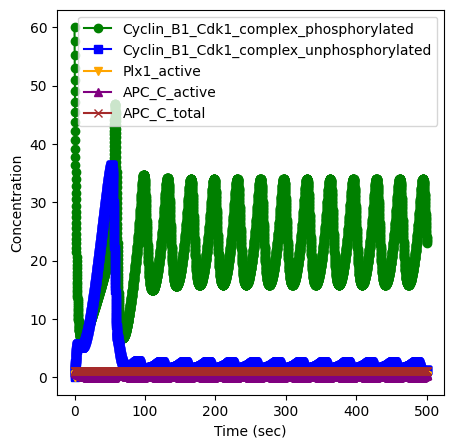

In [2]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1809060006/5/Tsai2014.xml"
ctlsb = ControlSBML(URL, times=np.linspace(0,500,5000))

ts = ctlsb.plotModel()

In [3]:
antimony_model = ctlsb.getAntimony()
print(antimony_model)

// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function function_for_cdk1a_degradation_by_apc_2(APC_C_active, Cyclin_B1_Cdk1_complex_phosphorylated, k_dest)
  k_dest*APC_C_active*Cyclin_B1_Cdk1_complex_phosphorylated;
end

function_for_cdk1a_degradation_by_apc_2 is "function for cdk1a degradation by apc_2"

function function_for_apc_activation_1(APC_C_active, APC_C_total, Plx1_active, ec50_apc, k_apc_on, n_apc)
  (k_apc_on/(1 + (ec50_apc/Plx1_active)^n_apc))*(APC_C_total - APC_C_active);
end

function_for_apc_activation_1 is "function for apc activation_1"

function function_for_cdk1a_degradation_by_apc_1(APC_C_active, Cyclin_B1_Cdk1_complex_unphosphorylated, k_dest)
  k_dest*APC_C_active*Cyclin_B1_Cdk1_complex_unphosphorylated;
end

function_for_cdk1a_degradation_by_apc_1 is "function for cdk1a degradation by apc_1"

function function_for_plx1_activation_1(Cyclin_B1_Cdk1_complex_phospho

### Control Objective 1: Maintain APC_C_active concentration above .5 by manipulating Plx1_active 

Text(0, 0.5, 'APC_C_active')

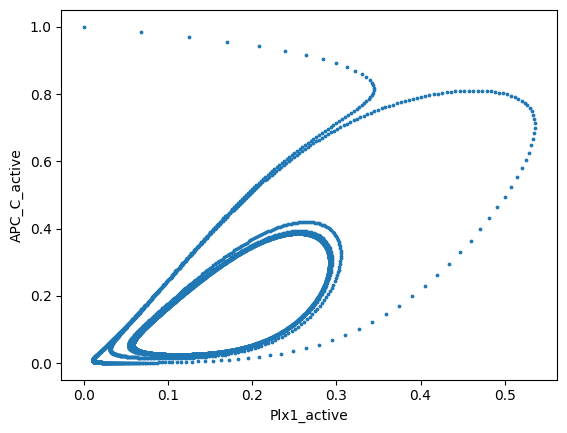

In [4]:
plt.scatter(ts["Plx1_active"], ts["APC_C_active"],s=3)
plt.xlabel("Plx1_active")
plt.ylabel("APC_C_active")

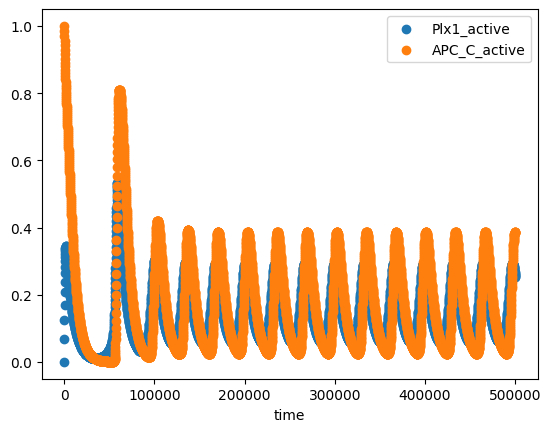

In [5]:
plt.scatter(ts.index, ts["Plx1_active"])
plt.scatter(ts.index, ts["APC_C_active"])
plt.xlabel("time")
plt.legend(["Plx1_active", "APC_C_active"])

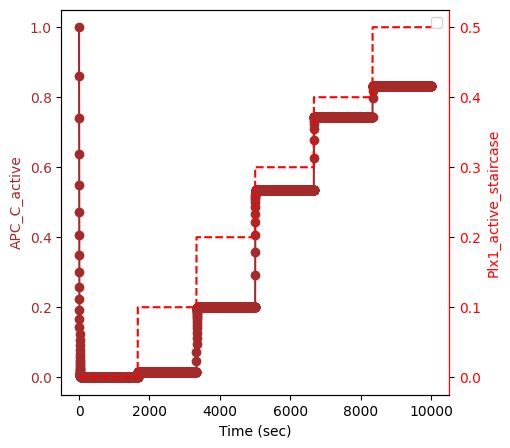

In [6]:
ctlsb = ControlSBML(URL, input_names=["Plx1_active"], output_names=["APC_C_active"], is_fixed_input_species=True, times=np.linspace(0, 10000, 10000))
_ = ctlsb.plotStaircaseResponse(final_value=.5)

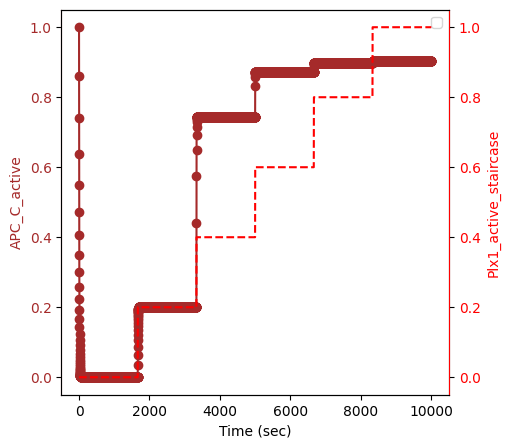

In [7]:
ctlsb = ControlSBML(URL, input_names=["Plx1_active"], output_names=["APC_C_active"], is_fixed_input_species=True, times=np.linspace(0, 10000, 10000))
_ = ctlsb.plotStaircaseResponse(final_value=1)

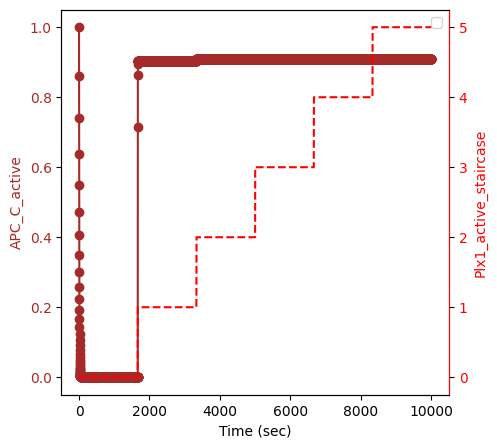

In [8]:
ctlsb = ControlSBML(URL, input_names=["Plx1_active"], output_names=["APC_C_active"], is_fixed_input_species=True, times=np.linspace(0, 10000, 10000))
_ = ctlsb.plotStaircaseResponse(final_value=5)

Increasing Plx1_active increases APC_C_active to an extent, but the concentration of APC_C_active reaches a maximum value around .9. This means the reasonable range of outputs os between 0 and .9 with the corresponding range of inputs from 0 to 1. All concentrations in this model are roughly nM, so these ranges seem biologically plausable. They are also well within the range of values seen in the plot of the overall SMBL model.

It looks like APC_C_active concentrations can be kept above .5 if Plx1_active concentrations are held steady between .4 and 1. 

### Control Objective 2: Cyclin_B1_Cdk1_complex_phosphorylated oscillation peak

Text(0, 0.5, 'Cyclin_B1_Cdk1_complex_phosphorylated')

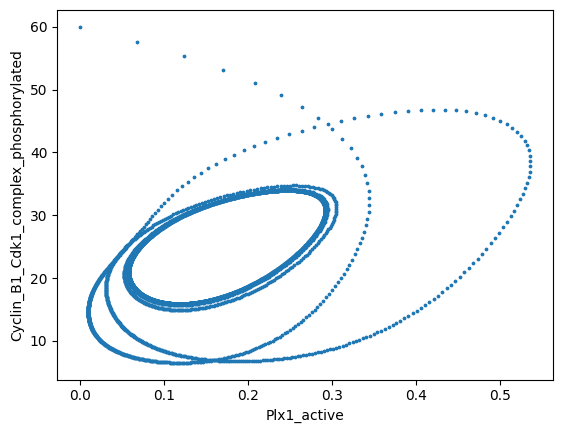

In [9]:
plt.scatter(ts["Plx1_active"], ts["Cyclin_B1_Cdk1_complex_phosphorylated"],s=3)
plt.xlabel("Plx1_active")
plt.ylabel("Cyclin_B1_Cdk1_complex_phosphorylated")

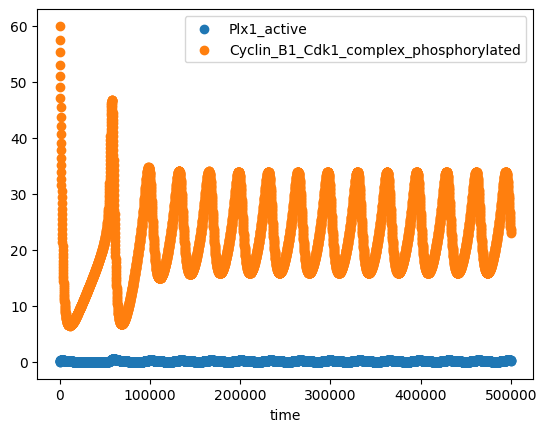

In [10]:
plt.scatter(ts.index, ts["Plx1_active"])
plt.scatter(ts.index, ts["Cyclin_B1_Cdk1_complex_phosphorylated"])
plt.xlabel("time")
plt.legend(["Plx1_active", "Cyclin_B1_Cdk1_complex_phosphorylated"])

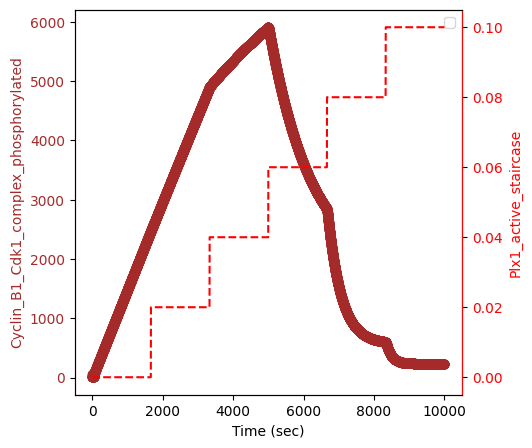

In [11]:
ctlsb = ControlSBML(URL, input_names=["Plx1_active"], output_names=["Cyclin_B1_Cdk1_complex_phosphorylated"], is_fixed_input_species=True, times=np.linspace(0, 10000, 10000))
_ = ctlsb.plotStaircaseResponse(final_value=.1)

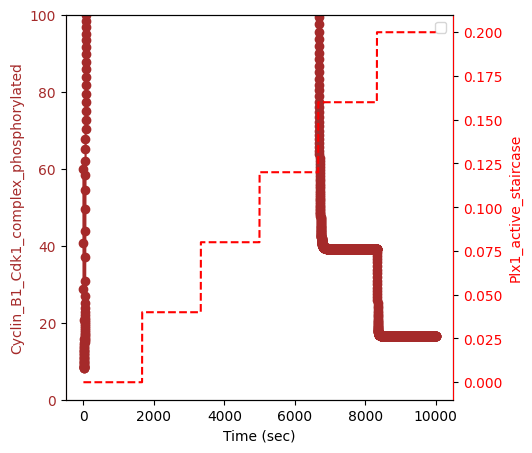

In [12]:
ctlsb = ControlSBML(URL, input_names=["Plx1_active"], output_names=["Cyclin_B1_Cdk1_complex_phosphorylated"], is_fixed_input_species=True, times=np.linspace(0, 10000, 10000))
_ = ctlsb.plotStaircaseResponse(final_value=.2, ylim=[0, 100])

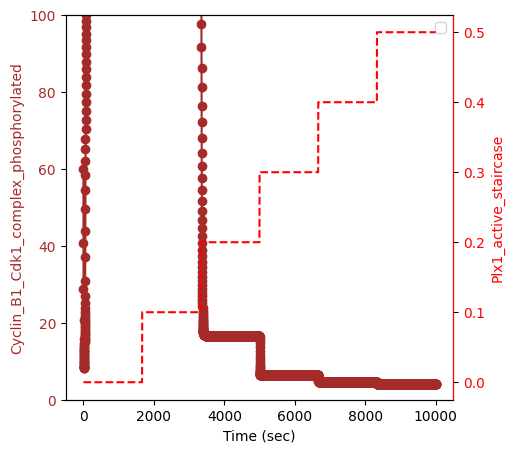

In [13]:
ctlsb = ControlSBML(URL, input_names=["Plx1_active"], output_names=["Cyclin_B1_Cdk1_complex_phosphorylated"], is_fixed_input_species=True, times=np.linspace(0, 10000, 10000))
_ = ctlsb.plotStaircaseResponse(final_value=.5, ylim=[0, 100])

Increasing Plx1_active past the threshold around .08 decreases the concentration of Cyclin_B1_Cdk1_complex_phosphorylated. Plx1_active concentrations below .04 do not impact Cyclin_B1_Cdk1_complex_phosphorylated concentration, and values between .04 and .08 seem to decrease its synthesis rate. At a Plx1_active concentration around .5, Cyclin_B1_Cdk1_complex_phosphorylated is essentially zero.

The operating range for the input for this objective is .04 to .5. I think the operating range for the output is from 0 to around 60. This is based on the maximum of 60 seen in the plot of the full SMBL model.

The range of outputs that can be achieved using the model are from 0 to infinity. At Plx1_active concentrations below .04, the Cyclin_B1_Cdk1_complex_phosphorylated concentration seems to continue indefinitely.

 It may be possible to achieve a Cyclin_B1_Cdk1_complex_phosphorylated concentration around 25 by holding Plx1_active around .2. Plx1_active concentrations above .2 will probablly repress Cyclin_B1_Cdk1_complex_phosphorylated below 25. This Plx1_active concentration is lower than the range identified to accomplish the first control objective, which makes me question whether it is feasible to achieve both my stated control objectives simultaneously.